In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv("Complete payment dataset.csv")
dataset.shape


(91, 5)

In [2]:
features = ['y', 't', 'p', 'Alpha']

X = dataset[features]
y = dataset['MARK']
print(X)
print(y)

    y  t  p  Alpha
0   1  0  5      1
1   1  0  6      1
2   1  0  7      1
3   1  0  8      1
4   1  0  3      2
.. .. .. ..    ...
86  1  6  2      3
87  1  6  2      4
88  1  6  1      5
89  1  6  2      5
90  1  7  1      5

[91 rows x 4 columns]
0     28
1     27
2     26
3     25
4     32
      ..
86    29
87    31
88    34
89    33
90    33
Name: MARK, Length: 91, dtype: int64


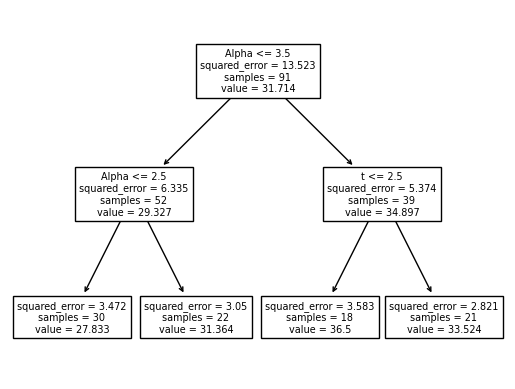

<Figure size 2400x1800 with 0 Axes>

In [3]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_leaf_nodes=4, criterion='squared_error')
regressor.fit(X, y)
tree.plot_tree(regressor,feature_names=features)
from matplotlib.pyplot import figure
# figure(figsize=(8, 6), dpi=300)
plt.rcParams['figure.figsize'] = [40, 20]
figure(figsize=(8, 6), dpi=300)
plt.savefig('hantree.png', dpi=300)

In [4]:
y_pred = regressor.predict(X)
print(y_pred)

[27.83333333 27.83333333 27.83333333 27.83333333 27.83333333 27.83333333
 27.83333333 27.83333333 27.83333333 31.36363636 31.36363636 31.36363636
 31.36363636 36.5        36.5        36.5        36.5        36.5
 36.5        27.83333333 27.83333333 27.83333333 27.83333333 27.83333333
 27.83333333 27.83333333 27.83333333 31.36363636 31.36363636 31.36363636
 31.36363636 36.5        36.5        36.5        36.5        36.5
 36.5        27.83333333 27.83333333 27.83333333 27.83333333 27.83333333
 27.83333333 31.36363636 31.36363636 31.36363636 31.36363636 36.5
 36.5        36.5        36.5        36.5        36.5        27.83333333
 27.83333333 27.83333333 27.83333333 31.36363636 31.36363636 31.36363636
 31.36363636 33.52380952 33.52380952 33.52380952 33.52380952 33.52380952
 33.52380952 27.83333333 27.83333333 31.36363636 31.36363636 31.36363636
 33.52380952 33.52380952 33.52380952 33.52380952 33.52380952 33.52380952
 27.83333333 31.36363636 31.36363636 33.52380952 33.52380952 33.52380952

In [5]:
all_classes=regressor.apply(X, check_input=True)

In [6]:
all_classes

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 4, 4, 4, 4, 6, 6, 6, 6, 6,
       6, 3, 3, 4, 4, 4, 6, 6, 6, 6, 6, 6, 3, 4, 4, 6, 6, 6, 6, 6, 4, 6,
       6, 6, 6], dtype=int64)

In [7]:
dict_tmp={}
dict_tmp['3']={}
dict_tmp['4']={}
dict_tmp['5']={}
dict_tmp['6']={}

for i in range(len(all_classes)):
    if all_classes[i] == 3:
        dict_tmp['3'][i]=all_classes[i] 
    elif all_classes[i] == 4:
        dict_tmp['4'][i]=all_classes[i]
    elif all_classes[i] == 5:
        dict_tmp['5'][i]=all_classes[i]
    elif all_classes[i] == 6:
        dict_tmp['6'][i]=all_classes[i]


In [8]:

i3 =np.array(list(dict_tmp['3'].keys()))
i4 =np.array(list(dict_tmp['4'].keys()))
i5 =np.array(list(dict_tmp['5'].keys()))
i6 =np.array(list(dict_tmp['6'].keys()))


In [9]:
for i in [i3, i4, i5, i6]:
    mean_X = np.mean(X.iloc[i])
    mean_y = np.mean(y.iloc[i])
    
    print(f"Mean of X.iloc[{i}]: {mean_X}")
    print(f"Mean of y.iloc[{i}]: {mean_y}")
    print("-----")

Mean of X.iloc[[ 0  1  2  3  4  5  6  7  8 19 20 21 22 23 24 25 26 37 38 39 40 41 42 53
 54 55 56 67 68 78]]: y        1.000000
t        1.500000
p        5.000000
Alpha    1.666667
dtype: float64
Mean of y.iloc[[ 0  1  2  3  4  5  6  7  8 19 20 21 22 23 24 25 26 37 38 39 40 41 42 53
 54 55 56 67 68 78]]: 27.833333333333332
-----
Mean of X.iloc[[ 9 10 11 12 27 28 29 30 43 44 45 46 57 58 59 60 69 70 71 79 80 86]]: y        1.000000
t        2.363636
p        3.272727
Alpha    3.000000
dtype: float64
Mean of y.iloc[[ 9 10 11 12 27 28 29 30 43 44 45 46 57 58 59 60 69 70 71 79 80 86]]: 31.363636363636363
-----
Mean of X.iloc[[13 14 15 16 17 18 31 32 33 34 35 36 47 48 49 50 51 52]]: y        1.0
t        1.0
p        2.5
Alpha    4.5
dtype: float64
Mean of y.iloc[[13 14 15 16 17 18 31 32 33 34 35 36 47 48 49 50 51 52]]: 36.5
-----
Mean of X.iloc[[61 62 63 64 65 66 72 73 74 75 76 77 81 82 83 84 85 87 88 89 90]]: y        1.000000
t        4.380952
p        2.238095
Alpha    4.571429
dtype: f

D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
